<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [ ]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [ ]:
#por conteo entiendo identificar los diferentes elementos que hay
especies=df['species'].unique()               #analisis exploratorio de los elementso en la columna species
especies


array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

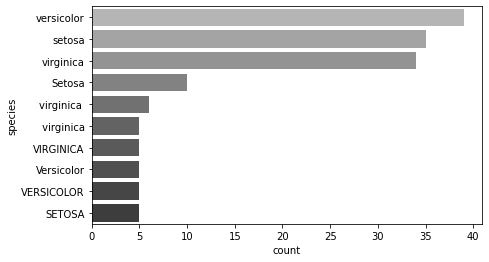

In [ ]:
plt.figure(figsize=(7, 4))

plot= sns.countplot(y="species", data=df, 
                    order=df['species'].value_counts().index,         #grafico para ver el conteo de los eelmentos en la columna species sin modifcar
                    palette="Greys_d", linewidth=3)
plt.show()

In [ ]:
df.loc[df['species'].isnull(),'species']='default'            #correccion de los elementos de la columna species en el formato corresponiente 
df['species']=df['species'].str.lower().str.strip()
especies=df['species'].unique()
especies

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [ ]:
largo_sepalo=df['sepalLength'].unique()                            #analisis exploratorio de los elementos de la columna sepalLength
largo_sepalo

array([4.4, 7.2, 6.3, 6.7, 5.8, 6.2, 6.8, 6.9, 7.7, 6.4, 6.5, 7.6, 7.1,
       5.6, 7.9, 5.7, 7.4, 7.3, 5.9, 6. , 6.1, 4.9, 5.4, 8. , 5.2, 6.6,
       7. , 5.5, 5.1, nan, 5. , 4.5, 4.6, 4.8, 4.7, 5.3])

In [ ]:
df.loc[df['sepalLength'].isnull(),'sepalLength']=0                #correccion de los elementos de la columna sepalLength en el formato deseado
largo_sepal=df['sepalLength'].unique()
largo_sepal

array([4.4, 7.2, 6.3, 6.7, 5.8, 6.2, 6.8, 6.9, 7.7, 6.4, 6.5, 7.6, 7.1,
       5.6, 7.9, 5.7, 7.4, 7.3, 5.9, 6. , 6.1, 4.9, 5.4, 8. , 5.2, 6.6,
       7. , 5.5, 5.1, 0. , 5. , 4.5, 4.6, 4.8, 4.7, 5.3])

In [ ]:
ancho_sepalo=df['sepalWidth'].unique()                            #analisis exploratorio de los elementos de la columna sepalWidth
ancho_sepalo

array([3.2, 3.6, 3.3, 3.4, 3.1, 2.8, 3. , 2.6, 3.8, 2.5, 2.7, 2.9, 2.2,
       5. , 2.3, nan, 2.4, 2. , 3.5, 3.7, 3.9, 4.4, 4.9, 4.2, 4. , 4.1])

In [ ]:
df.loc[df['sepalWidth'].isnull(),'sepalWidth']=0                  #correccion de los elementos de la columna sepalWidth en el formato deseado
ancho_sepal=df['sepalWidth'].unique()
ancho_sepal

array([3.2, 3.6, 3.3, 3.4, 3.1, 2.8, 3. , 2.6, 3.8, 2.5, 2.7, 2.9, 2.2,
       5. , 2.3, 0. , 2.4, 2. , 3.5, 3.7, 3.9, 4.4, 4.9, 4.2, 4. , 4.1])

In [ ]:
largo_petalo=df['petalLength'].unique()                            #analisis exploratorio de los elementos de la columna petalLength
largo_petalo

array([1.3, 6.1, 6. , 5.7, 5.6, 5.1, 5.4, 5.2, 5.9, 5.3, 6.9, 5.8, 6.7,
       6.6, 5.5, 4.9, 6.4, 5. , 6.3, 4.8, 4.5, 4.7, 4.2, 8. , 4.6, 3.9,
       4.4, 4. , 3.6, 4.1, 4.3, 3. , 3.8, 3.3, nan, 3.7, 3.5, 1.6, 1.7,
       1.5, 1.9, 1.4, 1. , 1.2, 1.1])

In [ ]:
df.loc[df['petalLength'].isnull(),'petalLength']=0                  #correccion de los elementos de la columna petalLength en el formato deseado
largo_petal=df['petalLength'].unique()
largo_petal

array([1.3, 6.1, 6. , 5.7, 5.6, 5.1, 5.4, 5.2, 5.9, 5.3, 6.9, 5.8, 6.7,
       6.6, 5.5, 4.9, 6.4, 5. , 6.3, 4.8, 4.5, 4.7, 4.2, 8. , 4.6, 3.9,
       4.4, 4. , 3.6, 4.1, 4.3, 3. , 3.8, 3.3, 0. , 3.7, 3.5, 1.6, 1.7,
       1.5, 1.9, 1.4, 1. , 1.2, 1.1])

In [ ]:
ancho_petalo=df['petalWidth'].unique()                            #analisis exploratorio de los elementos de la columna petalWidth
ancho_petalo

array([3. , 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.3, 1.2, 1.1, 1. , nan, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

In [ ]:
df.loc[df['petalWidth'].isnull(),'petalWidth']=0                  #correccion de los elementos de la columna petalWidth en el formato deseado
ancho_sepal=df['petalWidth'].unique()
ancho_sepal

array([3. , 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.3, 1.2, 1.1, 1. , 0. , 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

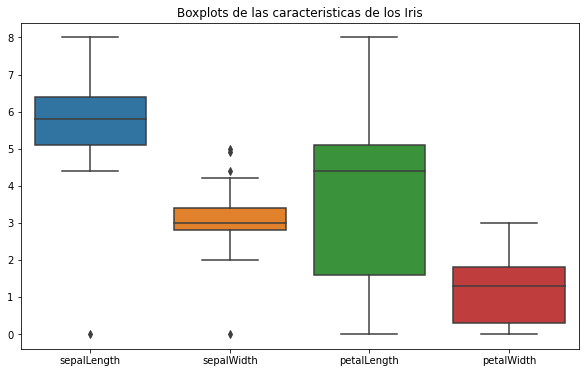

In [ ]:
caract=df.drop(['species'], axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=caract)
plt.title('Boxplots de las caracteristicas de los Iris')
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [ ]:
Label=[]                                                #lista que dice si un elemento es valido o no
for i in range(df.shape[0]):                            #ciclo for para determinar si los valores estan en el rango de valores validos
  sepalLength=df.iloc[i,0]
  sepalWidth=df.iloc[i,1]
  petalLength=df.iloc[i,2]
  petalWidth=df.iloc[i,3]
  especie=df.iloc[i,4]
  if sepalLength<4 or sepalLength>7 or sepalWidth<2 or sepalWidth>4.5 or petalLength<1 or petalLength>7 or petalWidth<0.1 or petalWidth>2.5 or especie=='default':
    Label.append('invalido')
  else:
    Label.append('valido')

new_df=df.assign(label=Label)                           #nuevo dataframe creada al agragar la columna label
new_df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,invalido
1,7.2,3.6,6.1,2.5,virginica,invalido
2,6.3,3.3,6.0,2.5,virginica,valido
3,6.7,3.3,5.7,2.5,virginica,valido
4,6.3,3.4,5.6,2.4,virginica,valido
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,valido
146,4.8,3.0,1.4,0.1,setosa,valido
147,4.9,3.1,1.5,0.1,setosa,valido
148,4.9,3.6,1.4,0.1,setosa,valido


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

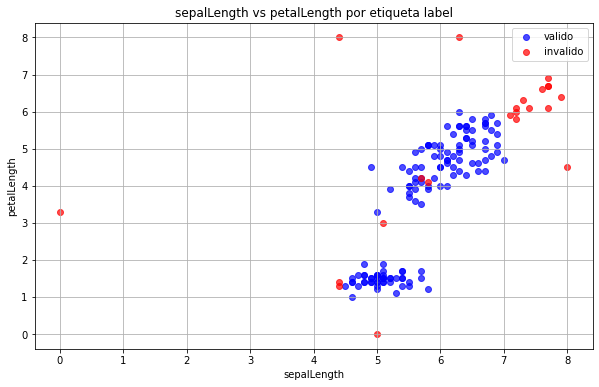

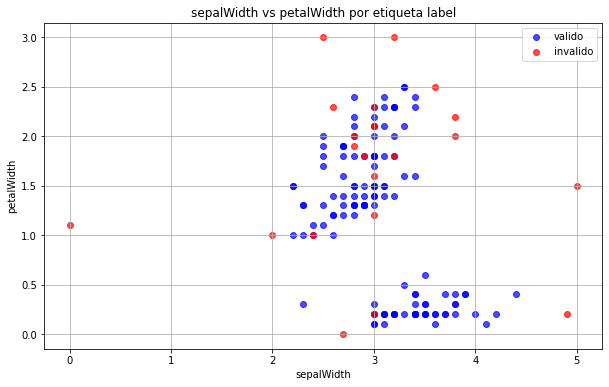

In [ ]:
datos_sepalLength_valido=new_df['sepalLength'].loc[new_df['label']=='valido']
datos_petalLength_valido=new_df['petalLength'].loc[new_df['label']=='valido']
datos_sepalLength_invalido=new_df['sepalLength'].loc[new_df['label']=='invalido']
datos_petalLength_invalido=new_df['petalLength'].loc[new_df['label']=='invalido']
datos_sepalWidth_valido=new_df['sepalWidth'].loc[new_df['label']=='valido']
datos_petalWidth_valido=new_df['petalWidth'].loc[new_df['label']=='valido']
datos_sepalWidth_invalido=new_df['sepalWidth'].loc[new_df['label']=='invalido']
datos_petalWidth_invalido=new_df['petalWidth'].loc[new_df['label']=='invalido']

plt.figure(figsize=(10, 6))
plt.scatter(datos_sepalLength_valido, datos_petalLength_valido, c="b", alpha= 0.7, label='valido')
plt.scatter(datos_sepalLength_invalido, datos_petalLength_invalido, c="r", alpha= 0.7, label='invalido')
plt.xlabel('sepalLength')
plt.ylabel('petalLength')
plt.title('sepalLength vs petalLength por etiqueta label')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(datos_sepalWidth_valido, datos_petalWidth_valido, c="b", alpha= 0.7, label='valido')
plt.scatter(datos_sepalWidth_invalido, datos_petalWidth_invalido, c="r", alpha= 0.7, label='invalido')
plt.xlabel('sepalWidth')
plt.ylabel('petalWidth')
plt.title('sepalWidth vs petalWidth por etiqueta label')
plt.grid()
plt.legend()
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

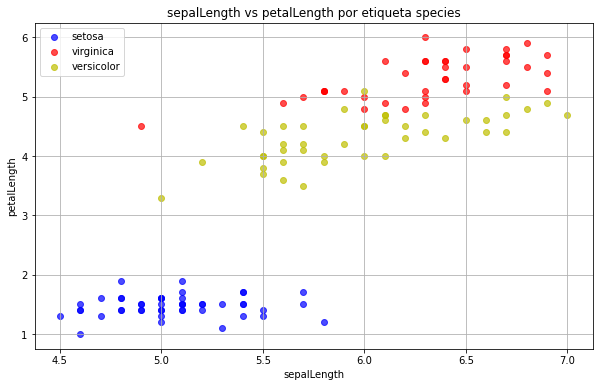

In [ ]:

data_valido=new_df.loc[new_df['label']=='valido']
sepalLength_setosa=data_valido[['sepalLength']].loc[data_valido['species']=='setosa']
petalLength_setosa=data_valido[['petalLength']].loc[data_valido['species']=='setosa']
sepalLength_virginica=data_valido[['sepalLength']].loc[data_valido['species']=='virginica']
petalLength_virginica=data_valido[['petalLength']].loc[data_valido['species']=='virginica']
sepalLength_versicolor=data_valido[['sepalLength']].loc[data_valido['species']=='versicolor']
petalLength_versicolor=data_valido[['petalLength']].loc[data_valido['species']=='versicolor']

plt.figure(figsize=(10, 6))
plt.scatter(sepalLength_setosa, petalLength_setosa, c="b", alpha= 0.7, label='setosa')
plt.scatter(sepalLength_virginica, petalLength_virginica, c="r", alpha= 0.7, label='virginica')
plt.scatter(sepalLength_versicolor, petalLength_versicolor, c="y", alpha= 0.7, label='versicolor')
plt.xlabel('sepalLength')
plt.ylabel('petalLength')
plt.title('sepalLength vs petalLength por etiqueta species')
plt.grid()
plt.legend()
plt.show()